# Práctico

Integrantes:
* Clara Quintana
* Ezequiel Juarez
* David Veisaga
* Jorge Pérez 

#### Descripción del dataset

El dataset que usaremos en este proyecto se lo instancia en un marco legal/jurídico, utilizando una parte del corpus de leyes de Argentina, tomado desde la página web oficial www.infoleg.gov.ar

#### Encuentren la frecuencia de ocurrencia de cada una de las palabras en el corpus.

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import seaborn
import collections
import requests
pandas.options.display.float_format = "{:.5f}".format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargamos el corpus y lo tokenizamos.

In [8]:
url = 'https://raw.githubusercontent.com/ezequiel23/DiploDatos_Mentoria_NLP/master/Trabajo%20Practico%201/Infoleg.cor'
r = requests.get(url, allow_redirects=True)
open('Infoleg.cor', 'wb').write(r.content)
file = open('Infoleg.cor', 'r')
text = file.read()



In [9]:
tokens = [t for t in text.split()]

Guardamos la cantidad total tokens

In [10]:
tokens_cantidad = len(tokens)
tokens_cantidad

3472236

Creamos un diccionario con la frecuencia de cada token y lo almacenamos en un DataFrame ordenado en forma descendente.

In [ ]:
diccionario = collections.Counter(tokens)

In [ ]:
df = pandas.DataFrame(diccionario.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)

Graficamos el Histograma de Frecuencia de Palabras, la cual sigue una distribución exponencial según ley de Zipf.

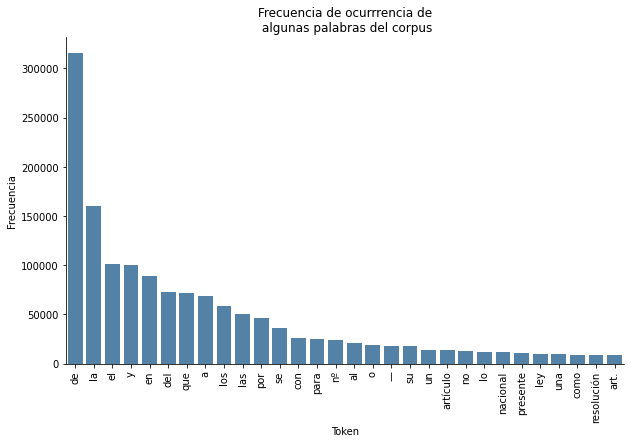

In [ ]:
plt.figure(figsize=(10,6))
seaborn.barplot(x=df[:30].Token, y=df[:30].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia de\n algunas palabras del corpus')
plt.xticks(rotation=90)
seaborn.despine()

Token | Frecuencia 
 :---: | ---: 
de | 315625 
la | 159827
el | 101042 

Se ve claramente que el segundo elemento (*la*) se repete aproximadamente con una frecuencia de 1/2 de la del primero (*de*), el tercer elemento (*el*) con una frecuencia de 1/3 y así sucesivamente.

#### Muestren algunas de las palabras más frecuentes, algunas de las menos frecuentes y algunas de las de frecuencia intermedia.

Mostramos las 20 palabras más frecuentes.

Son artículos y preposiciones. Son palabras que no tienen significado.

In [ ]:
df[:20]

,Token,Frecuencia
13,de,315625
17,la,159827
4,el,101042
24,y,100470
10,en,88737
78,del,72543
57,que,71553
83,a,68735
84,los,58023
159,las,50040


Mostramos las 20 palabras menos frecuentes.

Son palabras con un signo de puntuación pegado, como una coma o un punto. También hay números con algún signo pegado. 

In [ ]:
df[-20:]

,Token,Frecuencia
75192,270477/06,1
35699,menos.,1
75194,"800,00),",1
35697,estudiantes:,1
75196,300.00);,1
75198,"250,00)",1
75201,enumeración:,1
75213,8)—,1
75202,"1.088,85;",1
75203,playa:,1


Mostramos 20 palabras de frecuencia intermedia. 
Para ello, primero obtenemos un límite inferior y superior del rango de items a seleccionar.

In [ ]:
desde = int(df["Frecuencia"].count() / 4)
hasta = df["Frecuencia"].count() - desde
print(desde, hasta)

28825 86476


In [ ]:
df[32:97].sample(20, random_state=0)

,Token,Frecuencia
117,e,3126
6,sobre,3861
246,establecido,3170
380,oficial,2550
1321,cuando,3507
65,forma,3541
482,días,3678
48,1º,3330
574,esta,3954
407,si,2541


### Informacición Mutua Puntual (IMP)

A continuación intenten encontrar correlaciones entre palabras que ocurren una seguida de la otra, es decir, traten de identificar qué palabras ocurren más frecuentemente de lo que podríamos considerar casualidad detrás de otra palabra.

A esta medida se la llama Información Mutua y su instanciación en el Procesamiento del Lenguaje Natural se llama **Información Mutua Puntual. Encuentren cómo se implementa, y encuentren las secuencias de palabras con mayor IMP.**

Analicen cómo se correlacionan cosas (palabras entre ellas, palabras con contextos o palabras con categorías). Pueden usar correlación o IMP. Pueden observar relaciones entre palabras (o n-gramas) que ocurren una detrás de la otra, o que co-ocurren en el mismo párrafo, o entre palabras y contextos (título? tipo de Ley? están en el inicio de una oración?). Si tenemos categorías (p.ej., tema del texto), IM entre palabras y categorías.

Generamos un DataFrame con los bigrama.

In [ ]:
bigramas = []
for c in range(tokens_cantidad - 1):
    tupla = tokens[c], tokens[c+1]
    bigramas.append(tupla)

bigramas[:10]

[('"acuerdos', 'ley'),
 ('ley', '25.939'),
 ('25.939', 'apruébase'),
 ('apruébase', 'el'),
 ('el', 'acuerdo'),
 ('acuerdo', 'sobre'),
 ('sobre', 'cooperación'),
 ('cooperación', 'minera'),
 ('minera', 'suscripto'),
 ('suscripto', 'en')]

In [ ]:
dic_bigramas = collections.Counter(bigramas)

df_bigramas = pandas.DataFrame(dic_bigramas.items(), columns=["Bigrama", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)
df_bigramas[:20]

,Bigrama,Frecuencia
53,"(de, la)",56340
305,"(en, el)",24243
218,"(de, los)",16339
314,"(a, la)",16188
453,"(de, las)",14893
109,"(en, la)",12453
1337,"(por, el)",9322
625,"(que, se)",9251
1094,"(la, ley)",8676
731,"(por, la)",7873


Graficamos el Histograma de Frecuencia de Bigramas, la cual también sigue una distribución exponencial según ley de Zipf.

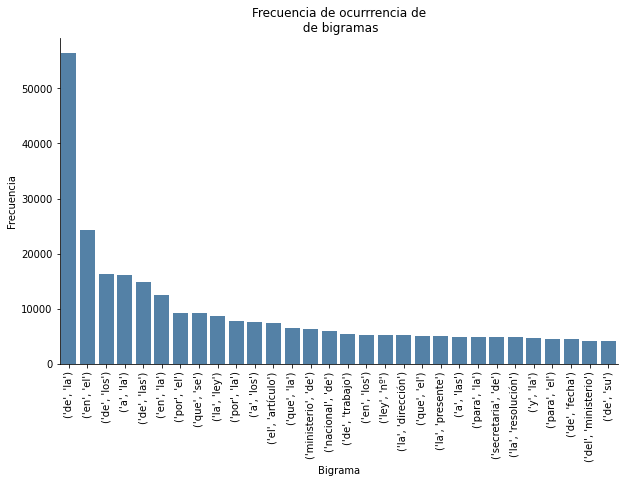

In [ ]:
plt.figure(figsize=(10,6))
seaborn.barplot(x=df_bigramas[:30].Bigrama, y=df_bigramas[:30].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia de\n de bigramas')
plt.xticks(rotation=90)
seaborn.despine()

Armamos la siguiente tabla:

| Palabra 1 | Palabra 2 | Frecuencia Palabra 1 | Frecuencia Palabra 2 | Frecuencia Co-ocurrentes | PMI |
| --- | --- | --- | --- | ---| --- |
| --- | --- | --- | --- | ---| --- |

In [ ]:
lista = []
for clave, valor in dic_bigramas.items():
    prob1 = diccionario[clave[0]] / tokens_cantidad
    prob2 = diccionario[clave[1]] / tokens_cantidad
    probCoOcu = valor / tokens_cantidad
    imp = numpy.log((valor / tokens_cantidad) / ((diccionario[clave[0]] / tokens_cantidad) * (diccionario[clave[1]] / tokens_cantidad)))
    item = clave[0], clave[1], diccionario[clave[0]], diccionario[clave[1]], valor, prob1, prob2, probCoOcu, imp
    lista.append(item)

In [ ]:
df_imp = pandas.DataFrame(lista, columns=["Palabra1", "Palabra2", "FrecuenciaPalabra1", "FrecuenciaPalabra2", "FrecuenciaCoOcurrencia", "Prob1", "Prob2", "ProbCoOcu", "IMP"])
df_imp.sort_values(by="IMP", ascending=False)

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
534566,"metamidophos,","fenthion,",1,1,1,0.00000,0.00000,0.00000,15.06031
629889,39.412,(3/09/2004).,1,1,1,0.00000,0.00000,0.00000,15.06031
629902,"siscen-0006.""","""sindicatura",1,1,1,0.00000,0.00000,0.00000,15.06031
587146,financial,accounting,1,1,1,0.00000,0.00000,0.00000,15.06031
134178,(1.800.000,m3/día),1,1,1,0.00000,0.00000,0.00000,15.06031
...,...,...,...,...,...,...,...,...,...
467932,la,a,159827,68735,1,0.04603,0.01980,0.00000,-8.05955
438147,por,de,46102,315625,1,0.01328,0.09090,0.00000,-8.34061
639820,la,la,159827,159827,1,0.04603,0.04603,0.00000,-8.90339
346689,de,en,315625,88737,1,0.09090,0.02556,0.00000,-8.99543


Observamos que los que tienen IMP de 15 tienen una Frecuencia de co-ocurrrencia de 1, por lo que filtramos los que tienen mas de 1000 co-ocurrencias, para obtener datos mas significativos.

In [ ]:
df_imp_filtrado = df_imp[df_imp.FrecuenciaCoOcurrencia > 1000].sort_values(by="IMP", ascending=False)
df_imp_filtrado

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
1222,"comuníquese,","publíquese,",1647,1683,1549,0.00047,0.00048,0.00045,7.57063
1223,"publíquese,",dése,1683,1900,1668,0.00048,0.00055,0.00048,7.50175
947,bs.,"as.,",2003,1980,1979,0.00058,0.00057,0.00057,7.45740
118,buenos,"aires,",2477,1365,1364,0.00071,0.00039,0.00039,7.24477
63571,(t.o.,2004).,2966,1180,1155,0.00085,0.00034,0.00033,7.04393
...,...,...,...,...,...,...,...,...,...
3909,o,de,19111,315625,1010,0.00550,0.09090,0.00029,-0.54231
3527,y,que,100470,71553,1107,0.02894,0.02061,0.00032,-0.62609
30,y,de,100470,315625,3896,0.02894,0.09090,0.00112,-0.85191
2583,la,que,159827,71553,1126,0.04603,0.02061,0.00032,-1.07330


Esta tabla tiene más sentido, dado que los primeros 2 binomios contienen palabras significativas que aparencen en la mayoría de los textos legales.

Los pares de palabras que son buenos candidatos para ser considerados como colocaciones obtienen valores altos de IMP porque la probabilidad de co-ocurrencia es solamente un poco menor que las probabilidades de ocurrencia de cada una de las palabras. Contrariamente, los pares de palabras cuyas probabilidades de ocurrencia son considerablemente mayores que su probabilidad de co-ocurrencia obtienen valores pequeños de IMP.

Graficamos la relación entre tokens de los bigramas con frecuencia de co-ocurrencia mayor a 1000 y con un IMP mayor a 3.

In [ ]:
df_tmp = df_imp_filtrado[df_imp_filtrado.IMP > 3]

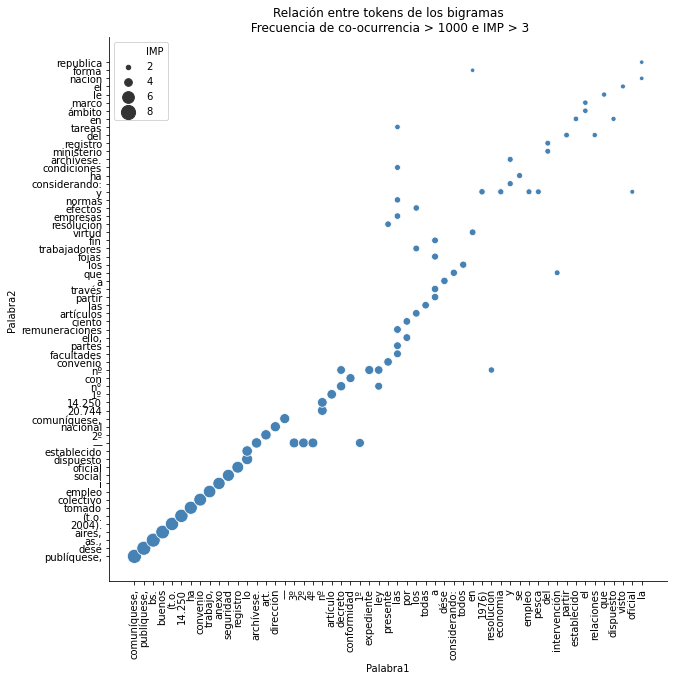

In [ ]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(x=df_tmp.Palabra1, y=df_tmp.Palabra2, size=df_tmp.IMP, color='steelblue', sizes=(20, 200))
plt.title('Relación entre tokens de los bigramas\n Frecuencia de co-ocurrencia > 1000 e IMP > 3')
plt.xticks(rotation=90)
seaborn.despine()

# Conclusiones


Debido a la mala limpieza de datos no alcanzamos a  lograr un acabado entendimiento del corpus.
En un primer análisis hemos obtenido palabras y pares de palabras que no son tan relevantes y generan ruido en los gráficos.

Después de tokenizar debemos limpiar los datos:

* Eliminar  signos  de puntuación: comas, comillas dobles, puntos, etc.
*   Eliminar artículos y preposiciones.
*   Llevar todo a minúscula (para facilitar la comparación).

Ademas para lograr un mejor entendimiento podríamos realizar las siguientes acciones sobre el corpus:
*   Identificar títulos, párrafos y oraciones.
*   Análisis sintáctico de oraciones, identificando sustantivos y verbos.
*   Análisis de tiempos verbales.
*   Buscar sinónimos para identificar si se repite la misma idea en forma distinta.


Estas apreciaciones están resueltas en por ejemplo en las siguientes librerías:



*   Natural Language Toolkit (NLTK)
*   Gensim
*   Polyglot
*   TextBlob
*   CoreNLP
*   spaCy
*   Pattern
*   Vocabulary
*   PyNLPl
*   Quepy


# Anexo prueba NLTK

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer #Mejores resultados con la lengua española

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tokenizador = ToktokTokenizer()
text_nltk = tokenizador.tokenize(text)
text_nltk[:10]

['"',
 'acuerdos',
 'ley',
 '25.939',
 'apruébase',
 'el',
 'acuerdo',
 'sobre',
 'cooperación',
 'minera']

In [20]:
tokens_cantidad_lntk = len(text_nltk)
tokens_cantidad_lntk - tokens_cantidad

349630

Esta diferencia es debido a que la función de tokenización 
de NLTK identifica mejor los signos de puntuación.

Las siguientes son ejemplos de funciones que se pueden utilizar para un mejor tratamiento del corpus:



In [28]:
#Elimino simbolos de puntuación
text_nltk = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, text_nltk)) 
#Paso a minuscula cada palabra
text_nltk = [word.lower() for word in text_nltk ]
# Con la siguiente line se eliminan artículos y preposiciones pero demora mucho tiempo ( mas de 10 minutos )
#text_nltk = list(filter(lambda token: token not in stopwords.words('spanish'), text_nltk)) 
text_nltk[:10]

['acuerdos',
 'ley',
 '25.939',
 'apruébase',
 'el',
 'acuerdo',
 'sobre',
 'cooperación',
 'minera',
 'suscripto']

Otras librerias internas de NLTK son:

*   PorterStemmer
*   WordNetLemmatizer